# K Means Clustering

Using KMeans Clustering to cluster Universities into to two groups, Private and Public.

Despite having the labels, since KMeans is unsupervised, the labels are not used to train.


## The Data

777 observations on the following 18 variables.
* **Private** A factor with levels No and Yes indicating private or public university
* **Apps** Number of applications received
* **Accept** Number of applications accepted
* **Enroll** Number of new students enrolled
* **Top10perc** Pct. new students from top 10% of H.S. class
* **Top25perc** Pct. new students from top 25% of H.S. class
* **F.Undergrad** Number of fulltime undergraduates
* **P.Undergrad** Number of parttime undergraduates
* **Outstate** Out-of-state tuition
* **Room.Board** Room and board costs
* **Books** Estimated book costs
* **Personal** Estimated personal spending
* **PhD** Pct. of faculty with Ph.D.
* **Terminal** Pct. of faculty with terminal degree
* **S.F.Ratio** Student/faculty ratio
* **perc.alumni** Pct. alumni who donate
* **Expend** Instructional expenditure per student
* **Grad.Rate** Graduation rate

## Import Libraries

** Import the libraries you usually use for data analysis.**

In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from sklearn import metrics
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt

## Get the Data

In [2]:
df = pd.read_csv('./data/05_KMeans_College_Data.csv', index_col=0)

In [3]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


## Data exploration

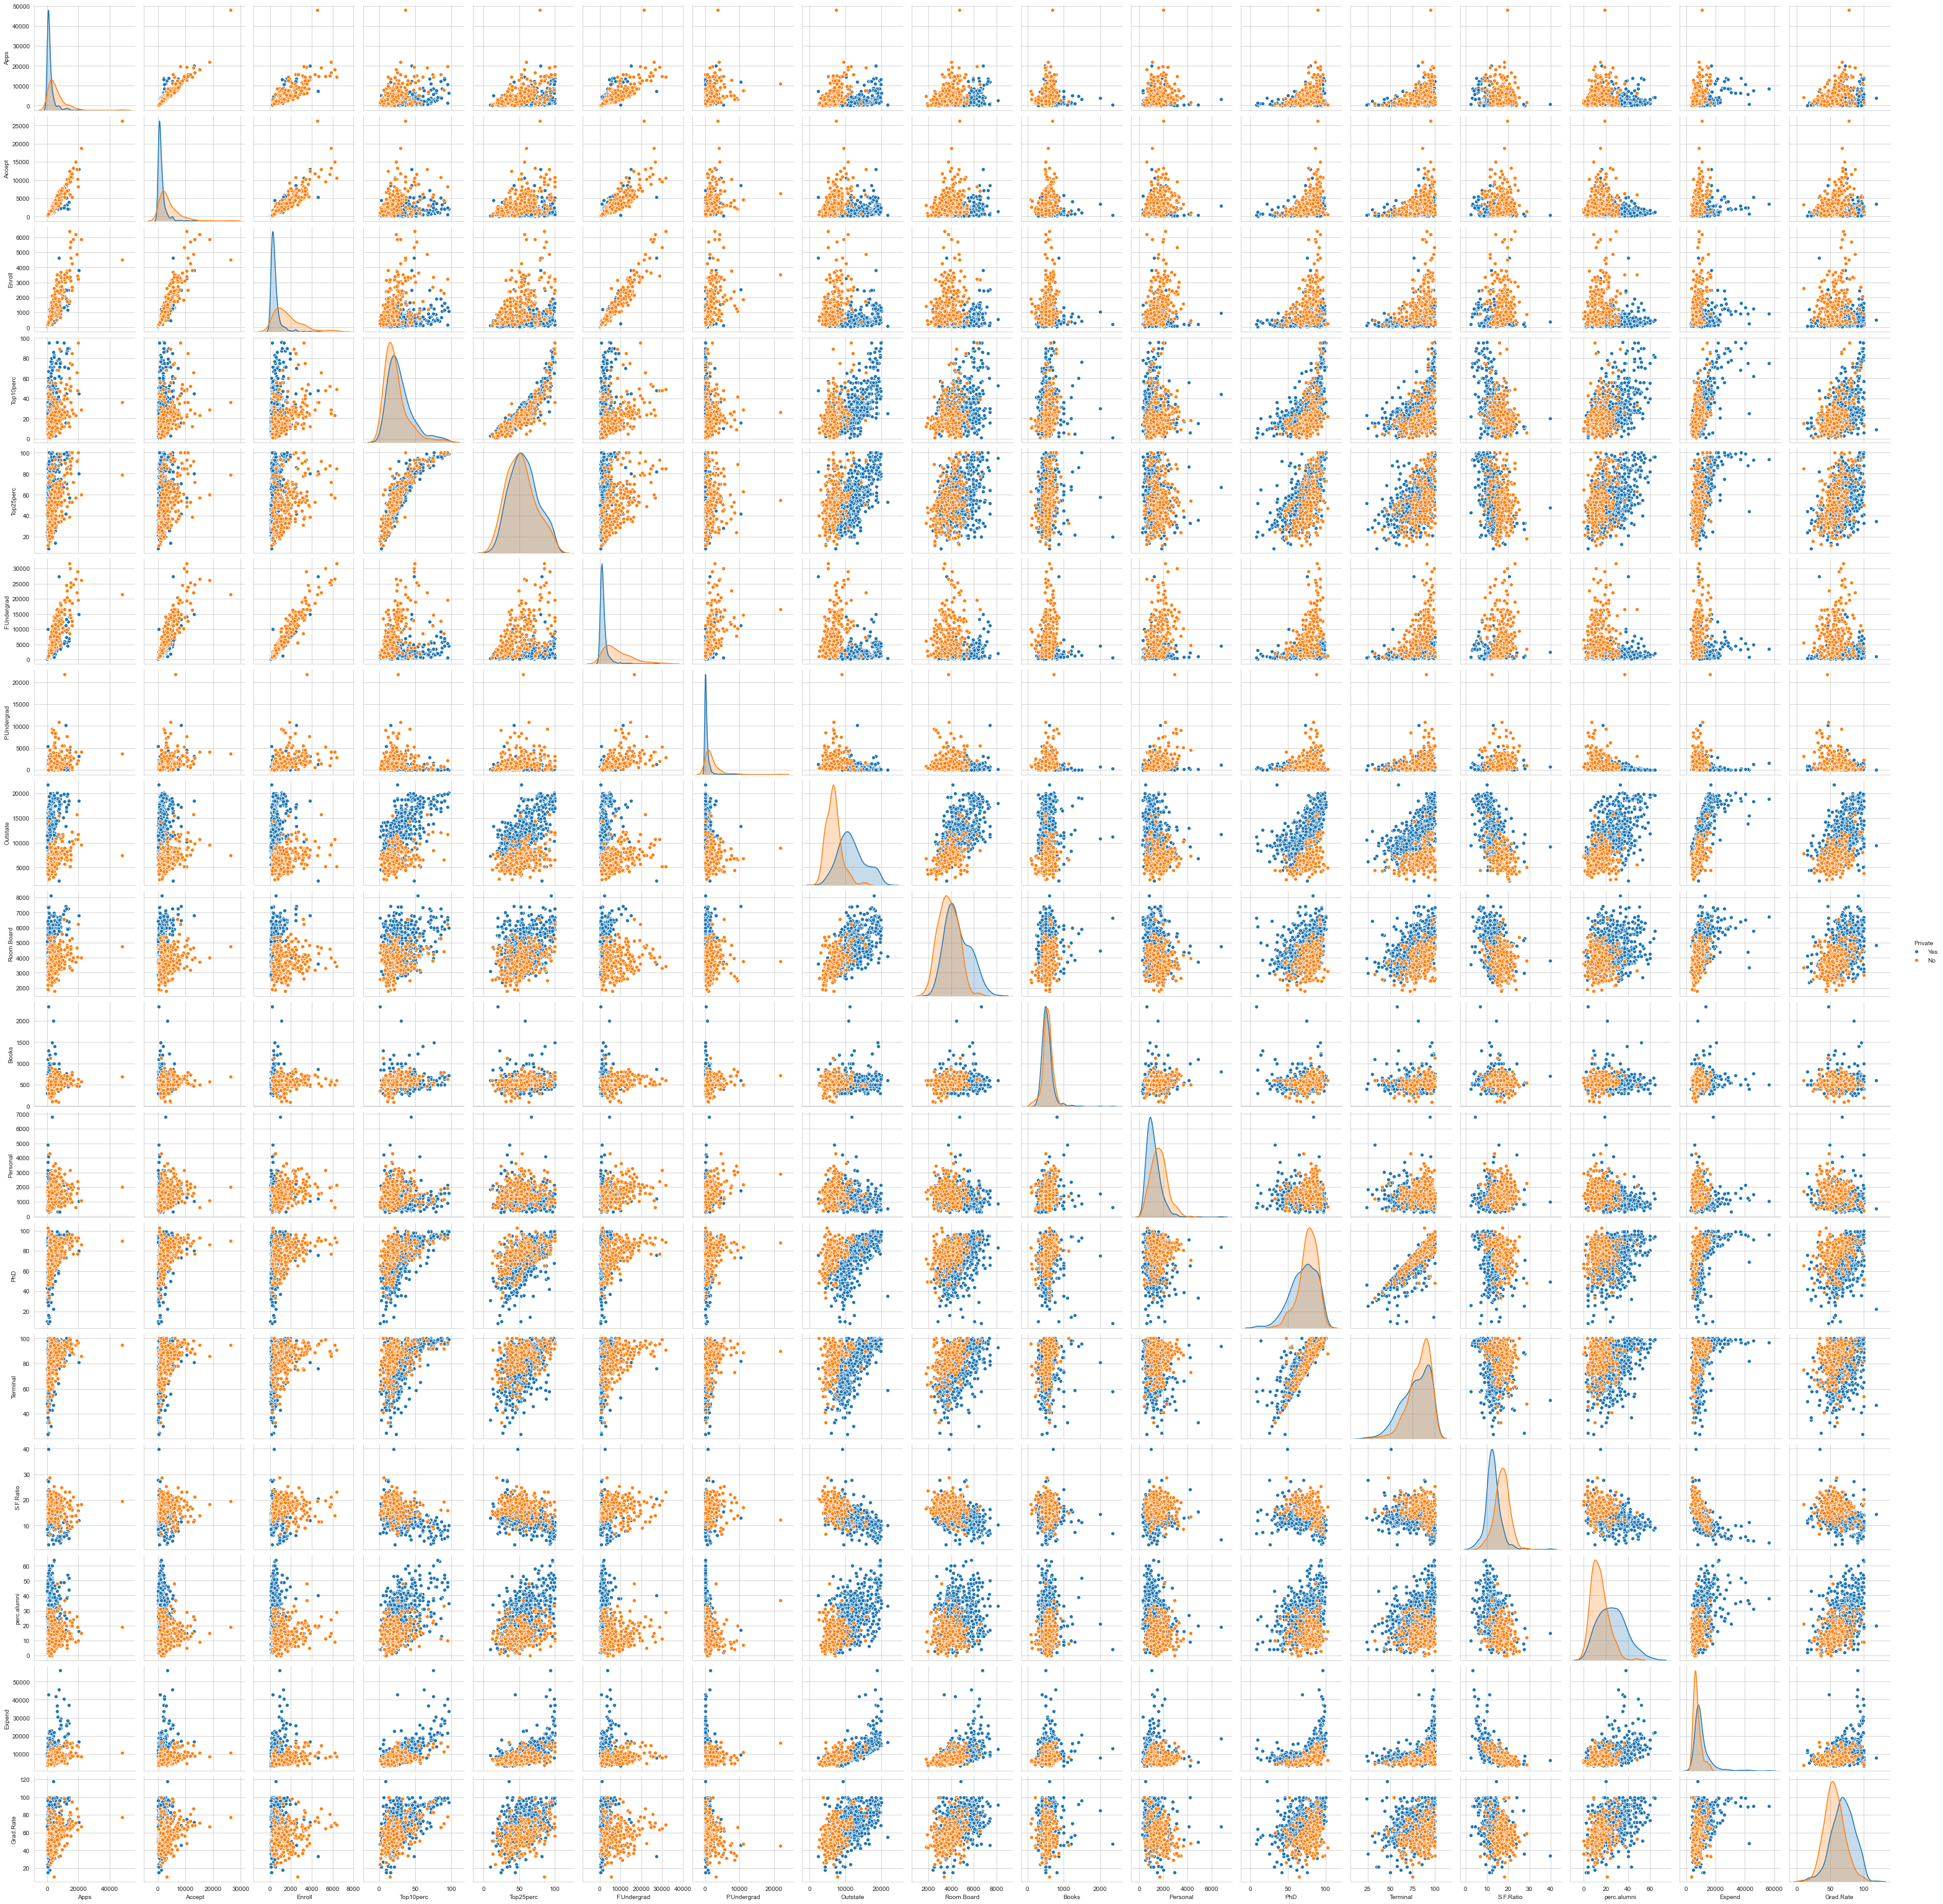

In [5]:
sns.pairplot(df, hue='Private')
plt.show()

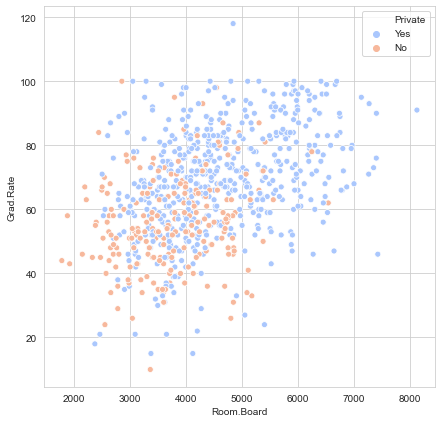

In [6]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['Room.Board'], y=df['Grad.Rate'], hue=df['Private'], palette='coolwarm')
plt.show()

**Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.**

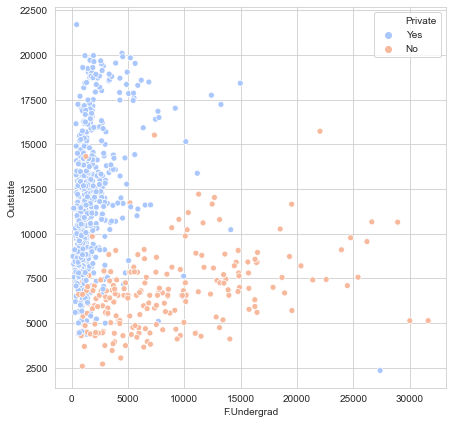

In [7]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['F.Undergrad'], y=df['Outstate'], hue=df['Private'], palette='coolwarm')
plt.show()

** Create a stacked histogram showing Out of State Tuition based on the Private column. Try doing this using [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). If that is too tricky, see if you can do it just by using two instances of pandas.plot(kind='hist'). **

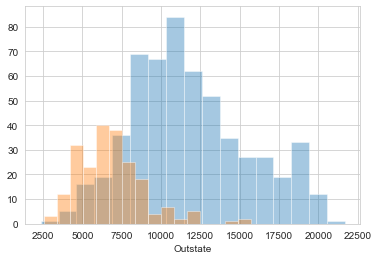

In [8]:
sns.distplot(df[df['Private'] == 'Yes']['Outstate'], kde=False)
sns.distplot(df[df['Private'] == 'No']['Outstate'], kde=False)
plt.show()

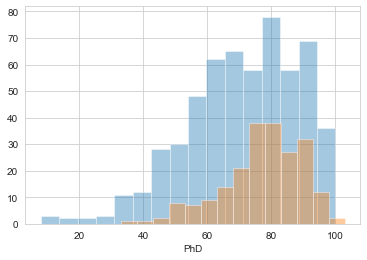

In [9]:
sns.distplot(df[df['Private'] == 'Yes']['PhD'], kde=False)
sns.distplot(df[df['Private'] == 'No']['PhD'], kde=False)
plt.show()

**Create a similar histogram for the Grad.Rate column.**

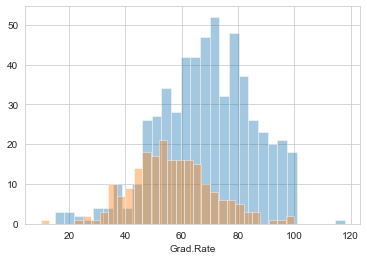

In [10]:
sns.distplot(df[df['Private'] == 'Yes']['Grad.Rate'], kde=False, bins=30)
sns.distplot(df[df['Private'] == 'No']['Grad.Rate'], kde=False, bins=30)
plt.show()

Correct Grad rates > 100%

In [11]:
df.loc[df['Grad.Rate'] > 100, :] = 100

## K Means Cluster Creation

Now it is time to create the Cluster labels!

** Import KMeans from SciKit Learn.**

** Create an instance of a K Means model with 2 clusters.**

In [12]:
km = KMeans(n_clusters=2)

**Fit the model to all the data except for the Private label.**

In [13]:
X = df.drop(columns=['Private'], axis=1)
km.fit(X)

KMeans(n_clusters=2)

In [14]:
km.cluster_centers_

array([[1.80763378e+03, 1.28218386e+03, 4.90406577e+02, 2.54454410e+01,
        5.35680120e+01, 2.18718834e+03, 5.95590433e+02, 1.03818311e+04,
        4.30427952e+03, 5.41234679e+02, 1.27973842e+03, 7.05590433e+01,
        7.79043348e+01, 1.42278027e+01, 2.32944694e+01, 8.92069058e+03,
        6.50926756e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [15]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Evaluation

Luckily, the dataset has the ground truth for the school being private or public, so there is some comparison to be made

In [16]:
df['Cluster'] = df['Private'].apply(lambda x: 1 if x == 'Yes' else 0)

In [17]:
print(metrics.confusion_matrix(df['Cluster'], km.labels_))
print(metrics.classification_report(df['Cluster'], km.labels_))

[[139  74]
 [530  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.32       213
           1       0.31      0.06      0.10       564

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777

